In [169]:
import numpy as np
import matplotlib.pyplot as plt

In [170]:
T=1000
dt=1

def brownian_motion(T, dt, mu, sigma):
    N = round(T/dt)
    t = np.linspace(0, T, N)
    W = np.random.normal(loc=mu, scale=sigma, size = N)
    W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
    return W

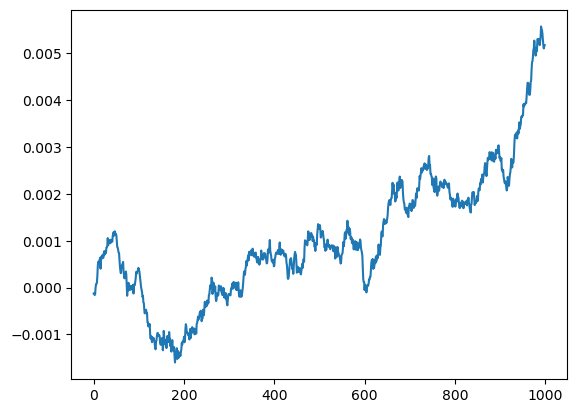

In [171]:
W = brownian_motion(T=T, dt=dt, mu=0, sigma=0.0001)
plt.plot(W)

In [172]:
def geometric_brownian_motion(T, mu, sigma, S0, dt):
        """
        Start = 20
        t, S = GeometricBrownianMotion(T=1000, mu=0.000, sigma=0.04, S0=Start, dt=1)
        """
        N = round(T/dt)
        t = np.linspace(0, T, N)
        W = np.random.standard_normal(size = N)
        W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
        X = (mu-0.5*sigma**2)*t + sigma*W
        S = S0*np.exp(X) ### geometric brownian motion ###
        return t, S

In [173]:
T = 1000
dt = 1
mu_ = brownian_motion(T=T, dt=dt, mu=0, sigma=0.000001)
t, sigma_ = geometric_brownian_motion(T=T, mu=0, sigma=0.01, S0=0.04, dt=1)
t, S = geometric_brownian_motion(T=T, mu=mu_, sigma=sigma_, S0=20, dt=1)

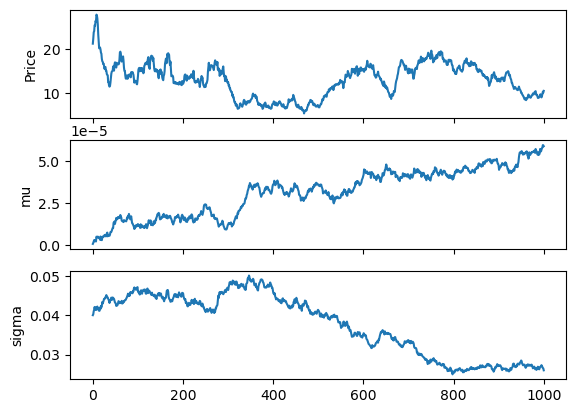

In [174]:
fig, axs = plt.subplots(3)

axs[0].plot(t, S)
axs[0].set_ylabel('Price')
axs[1].plot(t, mu_)
axs[1].set_ylabel('mu')
axs[2].plot(t, sigma_)
axs[2].set_ylabel('sigma')

for ax in axs.flat:
    ax.label_outer()

In [178]:
paths = 100
T = 1000

all_sigmas = np.zeros((paths, T))
all_mus = np.zeros((paths, T))
all_paths = np.zeros((paths, T))

for i in range(0, paths):
    mu_ = brownian_motion(T=T, dt=dt, mu=0, sigma=0.00001)
    all_mus[i,:] = mu_

for i in range(0, paths):
    t, sigma_ = geometric_brownian_motion(T=T, mu=0, sigma=0.01, S0=0.04, dt=1)
    all_sigmas[i,:] = sigma_


for i in range(0, paths):
    t, S = geometric_brownian_motion(T=T,
                                     mu=all_mus[i],
                                     sigma=all_sigmas[i],
                                     S0=20, dt=1)
    all_paths[i,:] = S

print(all_paths)

[[20.15007953 22.63983376 21.06003191 ...  2.45182144  2.56384349
   2.49254069]
 [18.90548275 17.73523566 17.87415938 ... 23.79740634 23.82092824
  24.05118994]
 [20.81772328 21.07037244 19.96683883 ...  5.16499207  5.46387289
   5.75844144]
 ...
 [21.10040475 21.93220387 22.67966101 ...  4.19402528  4.19571383
   4.11716445]
 [20.15587216 21.25127193 20.99394841 ...  0.48341784  0.50262882
   0.55606465]
 [19.15153337 19.49903569 20.25249093 ...  5.14169561  5.32265729
   5.37803271]]


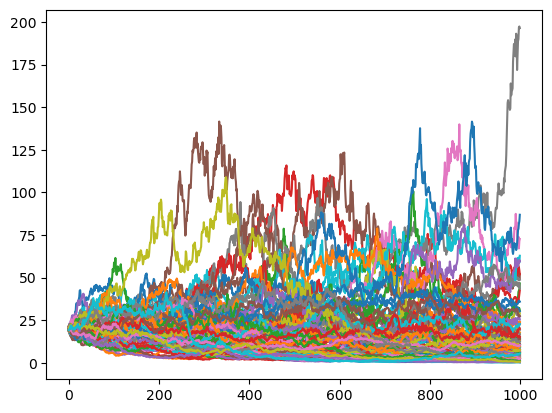

In [179]:
for i in all_paths:
    plt.plot(i)
plt.show()